In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pmdarima import auto_arima

!pip install yfinance  
import yfinance as yf

tsla_data = yf.download("TSLA", start="2018-01-01", end="2024-11-10")
tsla_data['Date'] = tsla_data.index
tsla_data.set_index('Date', inplace=True)
tsla_data = tsla_data[['Close']]


[*********************100%***********************]  1 of 1 completed


In [6]:
train_size = int(len(tsla_data) * 0.8)
train_data = tsla_data.iloc[:train_size]
test_data = tsla_data.iloc[train_size:]


In [7]:
arima_model = auto_arima(train_data['Close'], seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
arima_model.fit(train_data['Close'])


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=9267.844, Time=4.74 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=9266.298, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=9266.185, Time=0.47 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=9266.261, Time=0.63 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=9265.083, Time=0.14 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=9267.662, Time=2.42 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 8.666 seconds


ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


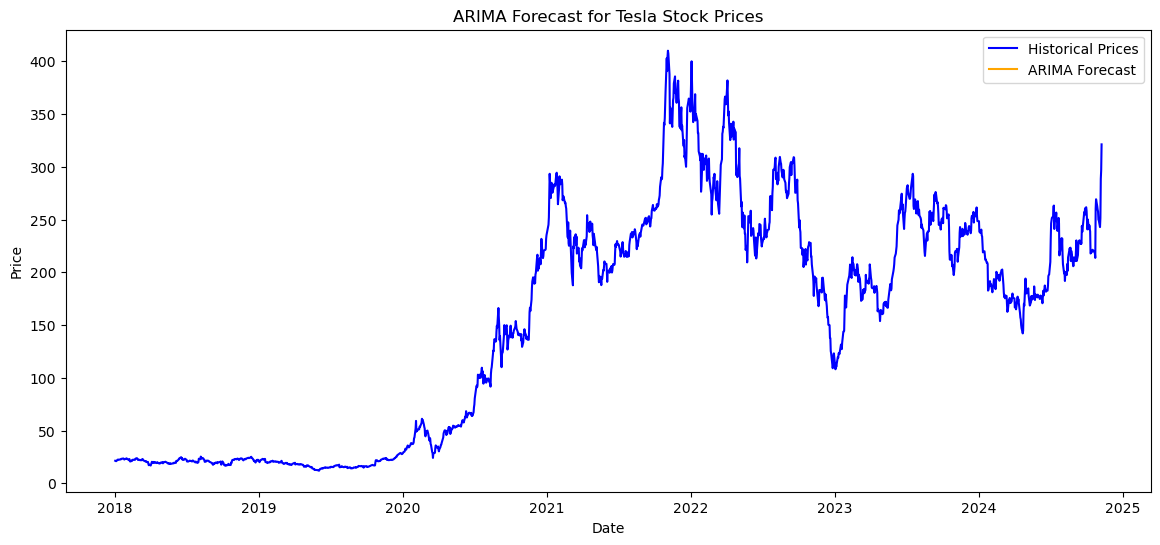

In [8]:
forecast_period = 180

arima_forecast = arima_model.predict(n_periods=forecast_period)
forecast_dates = pd.date_range(start=test_data.index[-1], periods=forecast_period)
arima_forecast_df = pd.DataFrame(arima_forecast, index=forecast_dates, columns=['ARIMA Forecast'])

plt.figure(figsize=(14, 6))
plt.plot(tsla_data['Close'], label='Historical Prices', color='blue')
plt.plot(arima_forecast_df, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Forecast for Tesla Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


In [9]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

test_forecast = arima_model.predict(n_periods=len(test_data))
mae = mean_absolute_error(test_data['Close'], test_forecast)
rmse = np.sqrt(mean_squared_error(test_data['Close'], test_forecast))

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Mean Absolute Error (MAE): 35.40
Root Mean Squared Error (RMSE): 45.07


C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\nejat\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
